# 教女友学习机器学习0X02——逻辑回归

## 拟合与分类
现在，我们需要知道一个概念——机器学习有两个重要功能：拟合和分类。我们的前两章都是在做拟合，无论是用直线、曲线、平面、曲面……但是，分类，我们好像还没接触过，其实机器学习在分类中的应用非常广泛，比如：给电脑一堆照片，让它分辨哪些是人，哪些是猫，哪些是狗；你收到了一封邮件，系统已经帮你分辨出了哪些是垃圾邮件，哪些是诈骗邮件；违章拍照系统自动识别车牌上的字母和数字，这个是A，这个是1……  
这次学习，我们还将继续使用使用Andrew Ng在Coursera上的[机器学习](https://www.coursera.org/learn/machine-learning/)的数据以及图片。  
PS:我在网上找到了[小小人\_V ](http://weibo.com/zjlibrary)整理的视频[笔记](http://vdisk.weibo.com/s/J4rRX/1373287206)，把思路理得非常顺畅，大家可以看看他写的笔记。

## 试试用线性回归来解决分类问题
假设我们从医院中拿到了一组数据，是肿瘤大小与是否为癌症的关系：  
![肿瘤大小](肿瘤大小.png)  
好像我们用一条直线也可以解决问题啊：  
![肿瘤大小2](肿瘤大小2.png)  
你看，训练（优化）的结果一条粉红色的直线，让其输出在小于0.5的点判断为没有癌症，大于0.5的点判断为有癌症，多么方便，简单啊！  
但是事实真的如此吗？这时候来了一个新的样本，这个样本的大小特别大：  
![肿瘤大小3](肿瘤大小3.png)  
这时候训练的结果是蓝线，哎呀我去，按照0.5来分辨，好像会搞出事情啊！！有几个点会判断出错唉！  
没错，这就是单纯使用线性回归做分类的坏处，还记得上一章提到的多项式回归吗？用曲线拟合点，我们可以把这种思路再拓宽一些，我还可以用其他的函数来做分类的事情，那么我们到底要什么样的函数呢？在肿瘤是小的时候，我们希望函数输出是0，肿瘤大的时候，我们希望函数输出是1，因此输出范围控制在0-1之间，同时，我们希望那些特别大的肿瘤样本出现的时候，别和之前训练的曲线偏差太多。在这里，我们使用的是逻辑函数——sigmoid。
## 逻辑函数
先来看看长啥样：  
![逻辑函数](逻辑函数.png)  
再来看一下sigmoid的公式：  
$g\left ( z \right )=\frac{1}{1+e^{-z}}$  
那么我们是怎么应用它的呢？还记得线性回归的方程吗？  
$h_{\theta}(x) = \theta^T x$  
我们现在要在外面套上逻辑函数了：  
$h_{\theta}(x) = g\left ( \theta^T x \right )=\frac{1}{1+e^{-\theta^T x}}$  
所以啊$\theta^T x$的责任还是和以前一样的，做条直线呗，只是这个直线的输出要作为逻辑函数的输入了。  
注意了，现在$h_{\theta}(x)$输出的就是0-1之间的值，我们可以视为概率，也就是说如果把一个肿瘤的尺寸输入进去，得到的是0.9，那么可以理解为此时得肿瘤的概率为0.9，用数学的式子来表达就是：  
$h_{\theta}(x)=P\left ( y=1|x;\theta \right )$  
**其实我并不太认同这个观点，我认为这个概率只是数学上针对该逻辑函数运算得到的输出值，并不是真正统计意义上的概率值，如果我不用sigmoid作为逻辑函数了，而是换了一个别的什么函数，可能输出就是0.85，但是统计上并不会因为科学家换了一个函数，就会改变这个大小的肿瘤是否是癌症的统计概率。当然，输出值大的肯定比小的要有更大的可能得癌症，但是统计上具体是0.9，还是0.85，我们并不知道。我也不太清楚这种想法对不对，希望能有人解答我的这个疑惑。**  
因此我们的判断边界就是找$h_{\theta}(x)=0.5$也就是$\theta^T x=0$，当$\theta^T x<0$预测$y=0$，$\theta^T x\geq 0$预测$y=1$。

## 看俩例子，深刻体会边界
第一个例子如下图所示：
![边界问题1](边界问题1.png)  
从图中我们能看出，两种不一样的点，我们暂且把×视为1，把○视为0，这样我们就成功把一个三维的问题映射到了二维的平面上了。我们很自然地想要用一条直线把它分割成两部分，也就是这条紫色的线  
在这里我们使用的预测函数是： 
$h_{\theta}(x) = g\left ( \theta _{0}x_{0}+\theta _{1}x_{1}+\theta _{2}x_{2} \right )$，同时我们也假设我们已经训练出来了，$\theta _{0}=-3$，$\theta _{1}=1$，$\theta _{2}=1$  
再来看我们紫色的这条线，这条线就是区分0还是1的分界线，请注意，**这条线是$-3+x_{1}+x_{2}=0$，这条线不是逻辑函数！**  
在线上方的，我们划分成1，在直线下方的，我们划分成0。
怎么？还是很难理解这条线不是逻辑函数这件事？这时候需要大家展开想象力了，把y轴加上，让这幅图变成一个三维的图，在这幅图中，有一条曲面，非常好地拟合图中所有的点，这条曲面就是我们的逻辑函数，这时候大家再想象有一条平面，代表的是$y=0.5$，这两条曲面一相交，就是我们的边界了。  
第二个例子：  
![边界问题2](边界问题2.png)  
这里我们的边界不能用直线来分辨了，但是可以用一个曲线，貌似是个圆：  
$h_{\theta}(x) = g\left ( \theta _{0}x_{0}+\theta _{1}x_{1}+\theta _{2}x_{2}+\theta _{3}x_{1}^2+\theta _{4}x_{2}^2 \right )$，同时我们也假设我们已经训练出来了，$\theta _{0}=0$，$\theta _{1}=0$，$\theta _{2}=0$，$\theta _{3}=1$，$\theta _{4}=1$，这里同样要注意，这个圆圈不是逻辑函数，是$-1+x_{1}^2+x_{2}^2=0$这条曲线，圆外面表示1，圆里面表示0。

## 代价函数
说了那么多，该说说代价函数了，不会构造代价函数，我们自己就无从训练。那么我们直接用之前所学的代价函数$J(\theta )=\frac{1}{2m}\sum_{i=0}^{m-1}\left ( h_{\theta}(x^{(i)})-y^{(i)} \right )^{2}$是否可行呢？答案是可以，但是效果不会特别好，因为这个用这种方法构建的代价函数是非凸函数（又扯到优化问题了，下一章还是讲一讲简单的优化概念吧……），非凸函数有不止一个极小值，但只有其中一个是最小值，这使得我们在优化的时候就比较困难，有的时候会把某个极小值当成最小值。
因此，我们能不能重新构造一下这个代价函数，使其是个凸函数呢？先上公式：  
$J(\theta )=\frac{1}{m}\sum_{i=1}^{m}Cost\left ( h_{\theta}(x^{(i)}),y^{(i)} \right )$  
$Cost\left ( h_{\theta}(x),y \right )=\begin{cases}
-log(h_{\theta}(x)) & \text{ if } y= 1\\ 
-log(1-h_{\theta}(x)) & \text{ if } y=0 
\end{cases}$  
它的工作原理是当y=1的时候，如果预测输出接近0，误差就会很大，接近1，误差就很小；y=0的时候，如果预测输出接近1，误差很大，接近0，误差很小。图像显示如下：  
![代价函数1](代价函数1.png)![代价函数2](代价函数2.png)  
可是毕竟上面的函数还要分y=1还是y=0，感觉还是怪怪的，没事，继续整合：  
$J(\theta )=-\frac{1}{m}\sum_{i=1}^{m}\left [ y^{(i)}log\left ( h_{\theta} \left (x^{(i)} \right ) \right ) + \left ( 1-y^{(i)} \right )log\left ( 1-h_{\theta} \left (x^{(i)} \right ) \right ) \right ]$  
非常巧妙地将上面的公式给合为一体了，而且还是个凸函数！

现在来实战一番吧

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
#为了在jupyter上画图加上这句话
%matplotlib inline
from scipy import optimize

先导入数据看看，这里需要解释一下
```
pos=np.where(y==1)
neg=np.where(y==0)
```
我们要找到y==1和y==0的索引值，并这两组索引作为画图时的区分。

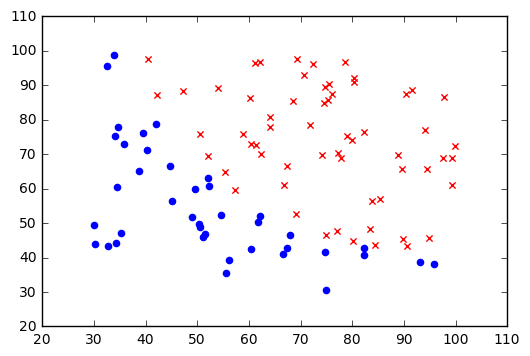

In [209]:
data=np.loadtxt('ex2data1.txt',delimiter=',')
X=data[:,0:2]
y=data[:,2]
pos=np.where(y==1)
neg=np.where(y==0)
plt.scatter(X[pos[0],0],X[pos[0],1],marker = 'x',color = 'r')
plt.scatter(X[neg[0],0],X[neg[0],1],marker = 'o',color = 'b')

## 设计预测函数

In [210]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def hypothesis(theta,X):
    return sigmoid(np.dot(X,theta.T))

## 设计代价函数

In [211]:
def computer_cost(theta,X,y):
    m=y.size
    return -1/m*np.sum((y*np.log(hypothesis(theta,X)))+((1-y)*np.log(1-hypothesis(theta,X_normal))))

## 特征缩放

In [212]:
def featureNormalize(X):
    mu = np.mean(X,0)
    sigma = np.std(X,0)
    return [(X-mu)/sigma,mu,sigma]

## 构造特征矩阵
图中，我们貌似可以用一条直线划分，但是好像不太贴切，最好还是用曲线划分，还是要注意哦，这里的直线曲线指的是边界，可不是说逻辑函数哦。所以我打算这样设计我的预测函数：  
$h_{\theta}(x) = g\left ( \theta _{0}x_{0}+\theta _{1}x_{1}+\theta _{2}x_{2}+\theta _{3}x_{1}^2+\theta _{4}x_{1}x_{2}+\theta _{5}x_{2}^2 \right )$  
这样一来我们就知道我们的$\theta$向量和$X$矩阵怎么构造了。现在阶数还算少，我可以手动构造，如果阶数多了，构造起来会很麻烦，所以需要做一个函数来生成我们的矩阵。  

In [213]:
def mapFeature(x1,x2,order):
    m=x1.size
    out = np.ones(m)
    for i in range(1,order+1):
            for j in range(0,i+1):
                out=np.c_[out,(x1**(i-j))*(x2**j)]
    return out

In [214]:
X_normal,mu,sigma = featureNormalize(X)
X_normal=mapFeature(X_normal[:,0],X_normal[:,1],2)

## 优化训练

In [217]:
result=optimize.basinhopping(computer_cost,(1,1,1,1,1,1),stepsize=0.1,niter=100,\
                             minimizer_kwargs={'method':'L-BFGS-B','args':(X_normal,y)})
print(result)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


                        fun: nan
 lowest_optimization_result:       fun: nan
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -3.08103196e-04,  -3.78775483e-04,  -4.90636351e-04,
         2.96436486e-04,   1.25972149e-04,   7.95811333e-05])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1561
      nit: 29
   status: 2
  success: False
        x: array([ 19.24113133,  18.22843621,  18.4780898 ,  -8.9954804 ,
        -4.60598876,  -6.278019  ])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 101
                       nfev: 16583
                        nit: 100
                          x: array([ 19.24113133,  18.22843621,  18.4780898 ,  -8.9954804 ,
        -4.60598876,  -6.278019  ])


## 画边界
边界实际上是预测函数输出为0.5时刻所在的曲线，如图所示，我们使用等高线来画出。

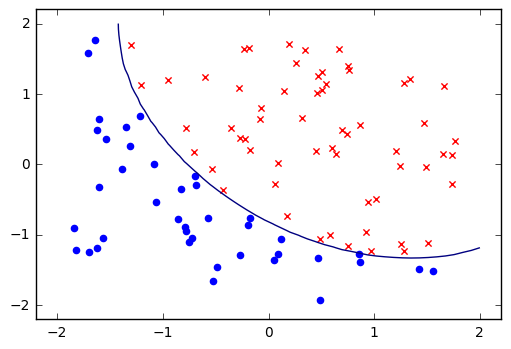

In [218]:
theta = result.x
plt.scatter(X_normal[pos[0],1],X_normal[pos[0],2],marker = 'x',color = 'r')
plt.scatter(X_normal[neg[0],1],X_normal[neg[0],2],marker = 'o',color = 'b')
x1=np.linspace(-2,2,50)
x2=np.linspace(-2,2,50)
x1,x2 = np.meshgrid(x1,x2)
h_plot=[]
for [i1,i2] in zip(x1,x2):
    try:
        h_plot=np.r_[h_plot,[hypothesis(theta,mapFeature(i1,i2,2))]]
    except:
        h_plot=[hypothesis(theta,mapFeature(i1,i2,2))]
plt.contour(x1,x2,h_plot,[0.5])

## 再看预测函数与边界之间的关系
为了更直观理解，我决定做一副3d图，大家应该就更好理解了，下面这幅图是在三维情况下红×和蓝○的分布，红色在1平面附近，蓝色在0平面附近

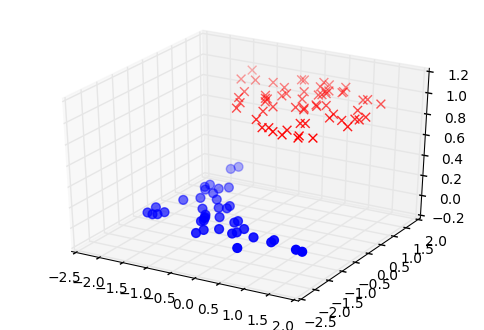

In [243]:
ax=plt.subplot(111,projection='3d')
ax.scatter(X_normal[pos[0],1],X_normal[pos[0],2],y[pos[0]],marker = 'x',color = 'r',s=40)
ax.scatter(X_normal[neg[0],1],X_normal[neg[0],2],y[neg[0]],marker = 'o',color = 'b',s=40)

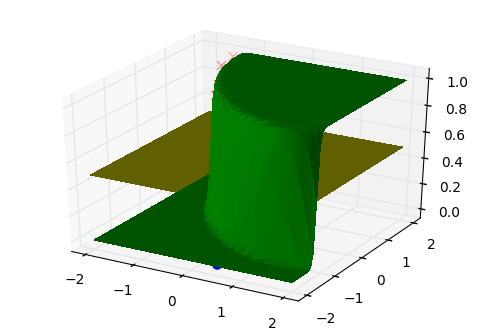

In [240]:
ax=plt.subplot(111,projection='3d')
ax.scatter(X_normal[pos[0],1],X_normal[pos[0],2],y[pos[0]],marker = 'x',color = 'r',s=40)
ax.scatter(X_normal[neg[0],1],X_normal[neg[0],2],y[neg[0]],marker = 'o',color = 'b',s=40)
h=hypothesis(theta,X_normal)
ax.plot_surface(x1,x2,h_plot,linewidth=0,rstride=1, cstride=1,antialiased=False,color='g')
plt.contour(x1,x2,h_plot,[0.5])
ax.plot_surface(x1,x2,0.5*np.ones(h_plot.shape),linewidth=0,rstride=1, cstride=1,antialiased=False,color='y')

动图更清晰，绿色的这条像瀑布的就是我们的预测函数，我们可以很清晰看到上面红色的×和下面蓝色的○都拟合得很好，而这个屎黄色的平面就是预测函数为0.5所在的平面，瀑布和屎黄色平面交界的那条线就是我们所说的边界
![3d动画](./3d动画.gif)

## 多分类
现在可能有人要问了，我们现在可以把东西分成两类，分别用0和1表示，那多个分类该怎么办呢？还记得我们小时候读书的时候数学老师经常会说的一句话吗？通过转换，我们把这个未知问题变成了已知问题，多分类也是这样，我们可以采取一对多的方法，将多分类问题转换成多个二元分类问题，比如以下问题：  
![1对多](1对多.png)  
我们要区分出三角、方块、叉叉，就要构造三个预测函数，比如我们说三角是1，方块是2，叉叉是3，那么当要区分三角的时候，我们就不要管方块和叉叉，把他们二者视为和三角不同的一类就行了，这样就变成了二元分类了，区分方块和叉叉的时候也是一样的。因此，我们的三个分类器可以写成一个函数：  
$h_{\theta}^{(i)}(x)=P\left ( y=i|x;\theta \right )$  
最后我们只要找到对应输出最大的那个i就是我们要的分类。

## 总结
我们通过在线性回归的基础上加入了逻辑函数，使得原来线性的拟合变成了非线性，然后我们找到预测函数为0.5的地方，作为分界，以这个分界线来分类，其实回过头来想，逻辑回归就是这么一回事，关键是要区分预测函数和边界就行了。